In [ ]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/YOLO_test
!mkdir Face_detection
%cd /content/gdrive/My Drive/YOLO_test/Face_detection

/content/gdrive/My Drive/YOLO_test
mkdir: cannot create directory ‘Face_detection’: File exists
/content/gdrive/My Drive/YOLO_test/Face_detection


# darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 14358 (delta 12), reused 12 (delta 4), pack-reused 14333
Receiving objects: 100% (14358/14358), 12.90 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (9789/9789), done.
Checking out files: 100% (2017/2017), done.


## 修改 Makefile
- GPU=1
- CUDNN=1
- CUDNN_HALF=1
- OPENCV=1

In [ ]:
!head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [ ]:
!sed -i "s/GPU=0/GPU=1/g" darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" darknet/Makefile
!sed -i "s/CUDNN_HALF=0/CUDNN_HALF=1/g" darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" darknet/Makefile

In [ ]:
!head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



## 編譯 darknet

In [ ]:
!cd darknet; make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# 人臉偵測

## 準備資料集
https://www.kaggle.com/dataturks/face-detection-in-images

In [ ]:
# 下載 data_convert_to_yolo.py 和 face_detection.json
!git clone https://gitlab.aiacademy.tw/jacky.chang/face_recognition/raw/master/data_covert_to_yolo.py
!git clone https://gitlab.aiacademy.tw/jacky.chang/face_recognition/raw/master/face_detection.json

/content/gdrive/My Drive/Face_detection/data


In [ ]:
# convert dataset to yolo form
!python data_covert_to_yolo.py

Processing 1/409 images...
Processing 2/409 images...
Processing 3/409 images...
Processing 4/409 images...
Processing 5/409 images...
Processing 6/409 images...
Processing 7/409 images...
Processing 8/409 images...
Processing 9/409 images...
Processing 10/409 images...
Processing 11/409 images...
Processing 12/409 images...
Processing 13/409 images...
Processing 14/409 images...
Processing 15/409 images...
Processing 16/409 images...
Processing 17/409 images...
Processing 18/409 images...
Processing 19/409 images...
Processing 20/409 images...
Processing 21/409 images...
Processing 22/409 images...
Processing 23/409 images...
Processing 24/409 images...
Processing 25/409 images...
Processing 26/409 images...
Processing 27/409 images...
Processing 28/409 images...
Processing 29/409 images...
Processing 30/409 images...
Processing 31/409 images...
Processing 32/409 images...
Processing 33/409 images...
Processing 34/409 images...
Processing 35/409 images...
Processing 36/409 images...
P

In [ ]:
!cat face/100.txt

0 0.255 0.3422391857506361 0.11333333333333331 0.36895674300254455
0 0.52 0.33969465648854963 0.22999999999999998 0.43511450381679395
0 0.7216666666666667 0.3104325699745547 0.1433333333333333 0.4122137404580153


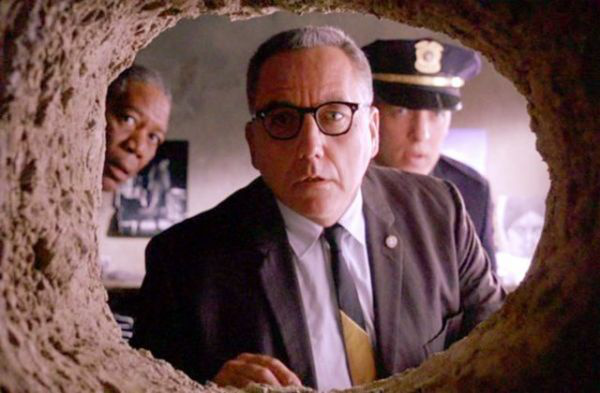

In [ ]:
from PIL import Image
Image.open('face/100.jpg')

## 設定 cfg

In [ ]:
if not os.path.exists("data"):
  os.mkdir("data") 

if not os.path.exists("weights"):
  os.mkdir("weights")

In [ ]:
!echo -e 'face' > data/face.names
!echo -e 'classes= 1\ntrain = data/train.txt\nvalid = data/val.txt\nnames = data/face.names\nbackup = weights' > data/face.data

In [ ]:
!head data/face.data

classes= 1
train = data/train.txt
valid = data/val.txt
names = data/face.names
backup = weights


In [ ]:
!head data/face.names

face


In [ ]:
!cp darknet/cfg/yolov4-tiny-custom.cfg data/yolov4-tiny-obj.cfg

In [ ]:
!sed -n -e 7p -e 8p -e 9p -e 20p -e 22p -e 212p -e 220p -e 263p -e 269p data/yolov4-tiny-obj.cfg

subdivisions=1
width=416
height=416
max_batches = 500200
steps=400000,450000
filters=255
classes=80
filters=255
classes=80


In [ ]:
!sed -i '7s/1/16/' data/yolov4-tiny-obj.cfg
!sed -i '8s/416/288/' data/yolov4-tiny-obj.cfg
!sed -i '9s/416/288/' data/yolov4-tiny-obj.cfg
!sed -i '20s/500200/4000/' data/yolov4-tiny-obj.cfg
!sed -i '22s/400000,450000/3200,3600/' data/yolov4-tiny-obj.cfg
!sed -i '212s/255/18/' data/yolov4-tiny-obj.cfg
!sed -i '220s/80/1/' data/yolov4-tiny-obj.cfg
!sed -i '263s/255/18/' data/yolov4-tiny-obj.cfg
!sed -i '269s/80/1/' data/yolov4-tiny-obj.cfg

In [ ]:
!sed -n -e 7p -e 8p -e 9p -e 20p -e 22p -e 212p -e 220p -e 263p -e 269p data/yolov4-tiny-obj.cfg

subdivisions=16
width=288
height=288
max_batches = 4000
steps=3200,3600
filters=18
classes=1
filters=18
classes=1


## 修改預設 anchors 值

In [ ]:
!chmod 777 darknet/darknet

In [42]:
# 跑完記得要按 Enter
!darknet/darknet detector calc_anchors data/face.data -num_of_clusters 6 -width 288 -height 288 -showpause

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 6, width = 288, height = 288 
 read labels from 367 images 
 loaded 	 image: 367 	 box: 1004
 all loaded. 

 calculating k-means++ ...

 iterations = 36 


counters_per_class = 1004

 avg IoU = 73.47 % 

Saving anchors to the file: anchors.txt 
anchors =  21, 34,  29, 62,  56, 46,  45, 89,  68,124, 100,191



In [40]:
#至 data/yolov4-tiny-obj.cfg 的第 219, 268 行修改 anchors 
!sed -n -e 268p data/yolov4-tiny-obj.cfg

anchors = 21,34,  29,62,  56,46,  45,89,  68,124,  100,191


## 訓練模型

In [ ]:
# 下載預訓練模型
!cd data; wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [43]:
!darknet/darknet detector train data/face.data data/yolov4-tiny-obj.cfg data/yolov4-tiny.conv.29 -dont_show -map 

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.826317, GIOU: 0.824601), Class: 0.999384, Obj: 0.597965, No Obj: 0.002230, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.134393, iou_loss = 0.222373, total_loss = 0.356766 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.735480, GIOU: 0.721766), Class: 0.999608, Obj: 0.657071, No Obj: 0.000945, .5R: 1.000000, .75R: 0.500000, count: 2, class_loss = 0.214812, iou_loss = 1.193431, total_loss = 1.408243 
 total_bbox = 643827, rewritten_bbox = 0.076884 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.834320, GIOU: 0.833988), Class: 0.999631, Obj: 0.244391, No Obj: 0.001305, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.143133, iou_loss = 0.099777, total_loss = 0.242910 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.768489, GIOU: 0.765718), Class: 0.999432, Obj: 0.768518, No Obj: 0.004124, .5R: 0.909091, .75R:

## 測試圖片

In [44]:
!cp data/yolov4-tiny-obj.cfg data/yolov4-tiny-test.cfg
# 將 Training 注釋掉, Testing 打開

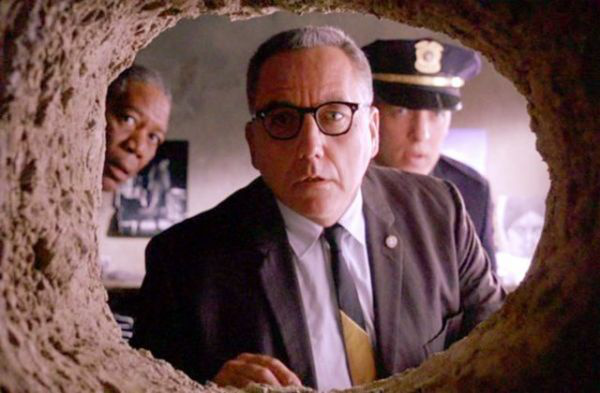

In [48]:
Image.open('face/100.jpg')

In [49]:
!darknet/darknet detector test data/face.data data/yolov4-tiny-test.cfg weights/yolov4-tiny-obj_best.weights face/100.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

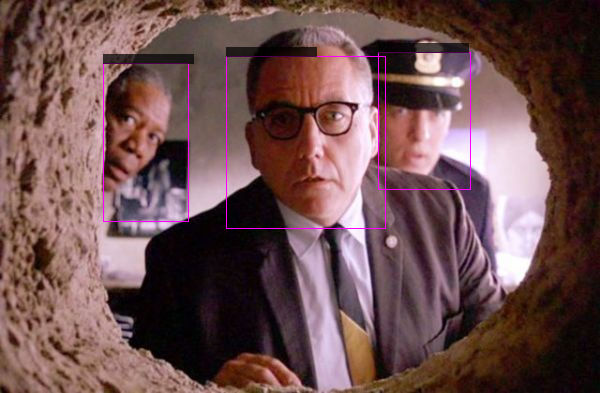

In [50]:
Image.open('predictions.jpg')